### DeepLearning for leaf_Disease Detection of Tomato leaves
 train a deep neural network to identify 5 disease of leaf diseases of Tomato plant.

#### This Model analyze 11118 images of Tomato leaves, 
#### 10207 for train and validate the model and 911 image for testing the output of the model
this set of images spread of 6 class labels assigned to them. Each classlabel is a 
disease pair,and we make a Neoral network to predict the disease
pair given just the image of the plantleaf.
the size of the images is 256*256 pixels and we resize them to 120*120

### Import libraries

In [10]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#import os
#import cv2
from tqdm import tqdm
#import pickle
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#from tqdm import tqdm
#from PIL import ImageEnhance
#from PIL import Image as pil_image
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import random
from keras.regularizers import l1 , l2
#reg = l1(0.001)
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


#### Load dataset 

In [3]:
#Loading Data file names and lables
train=pd.read_csv('train6.csv')

In [4]:
train.head()

,image_name,lable
0,T(1),0
1,T(2),0
2,T(3),0
3,T(4),0
4,T(5),0


In [5]:
train.shape

(10207, 2)

In [78]:
#train.describe(include='all')

In [9]:
train.shape[0]

10207

In [7]:
train.size

20414

In [282]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 2 columns):
image_name    10207 non-null object
lable         10207 non-null int64
dtypes: int64(1), object(1)
memory usage: 159.6+ KB
None


In [5]:
#image names and lables
print(" image names:    " , train['image_name'].unique(),
      "\n","lable of images:" ,train['lable'].unique())

 image names:     ['T(1)' 'T(2)' 'T(3)' ... 'T(10205)' 'T(10206)' 'T(10207)'] 
 lable of images: [0 1 2 3 4 5]


In [6]:
len(train['lable'].unique().tolist())

6

In [7]:
# the number of data in each class
train["lable"].value_counts()

3    3208
2    2127
5    1908
0    1591
4    1000
1     373
Name: lable, dtype: int64

In [284]:
# list of lables " start from 0 not from 1 "
unique_lable = train['lable'].unique()
print(unique_lable)

[0 1 2 3 4 5]


In [7]:
print(train.iloc[1590])
print(train.iloc[1591])
print(train.iloc[1964])
print(train.iloc[4092])
print(train.iloc[7300])
print(train.iloc[8300])
print(train.iloc[10206])

image_name    T(1591)
lable               0
Name: 1590, dtype: object
image_name    T(1592)
lable               1
Name: 1591, dtype: object
image_name    T(1965)
lable               2
Name: 1964, dtype: object
image_name    T(4093)
lable               3
Name: 4092, dtype: object
image_name    T(7301)
lable               4
Name: 7300, dtype: object
image_name    T(8301)
lable               5
Name: 8300, dtype: object
image_name    T(10207)
lable                5
Name: 10206, dtype: object


In [107]:
train['image_name'].iloc[0]

'T(1)'

## Load Image Data

In [5]:
# read all the training images, store them in a list, and convert that list into a numpy array
train_image =[]
for i in  tqdm(range(train.shape[0])):
        img = image.load_img('total_data\\'+'T('+str(i)+')'+'.jpg', target_size=(50,50))# , grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
       # img = image.load_img('10/'+train['Image_Name'][i]+'.jpg' ,

100%|████████████████████████████████████████████████████████████████████████████| 10207/10207 [01:57<00:00, 86.54it/s]


In [ ]:
#train_image =[]
#for i in  tqdm(range(train.shape[0])):
        img = image.load_img('10\\'+train['File Name'].iloc[i]+'.jpg', target_size=(28,28), grayscale=False)#,grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
X = np.array(train_image)

In [6]:
# append images to 'X' and Lables to 'y'
X = np.array(train_image)
y=train['lable'].values


In [7]:
#Creating a validation set from the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [288]:
# the shapes
print("X shape is:          " , X.shape , "\n",
      'X_train shape is:   ' , X_train.shape,"\n",
      'X test shape is    ' , X_test.shape,"\n" ,
      'y_train shape is:   ' ,y_train.shape )

X shape is:           (10207, 120, 120, 3) 
 X_train shape is:    (8165, 120, 120, 3) 
 X test shape is     (2042, 120, 120, 3) 
 y_train shape is:    (8165,)


In [289]:
y_train

array([2, 3, 5, ..., 3, 0, 3], dtype=int64)

In [290]:
y

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [294]:
y.ndim

1

In [8]:
class_names=['healthy','mosai_virus','bactrial_spot','yellowLeaf_virus','early_blight','late_blight']

In [295]:
# count of each class 
train["lable"].value_counts()

3    3208
2    2127
5    1908
0    1591
4    1000
1     373
Name: lable, dtype: int64

In [147]:
test['lable'].value_counts()

0    265
3    220
1    163
4    125
2     85
5     53
Name: lable, dtype: int64

In [296]:
# first item in y_train is:
class_names[y[0]]

'healthy'

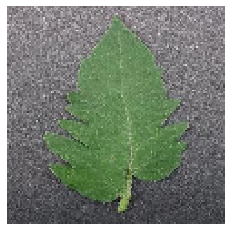

In [302]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[0]
#some_digit_image = some_digit.reshape(120,120)
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

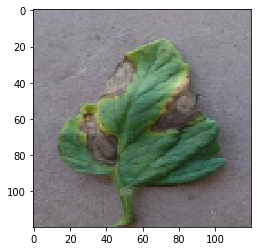

In [308]:
plt.imshow(X_train[3], cmap="binary")
#plt.axis('off')
plt.show()

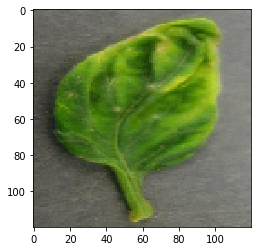

In [325]:
plt.imshow(X[7000], cmap="binary")

Populating the interactive namespace from numpy and matplotlib


c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


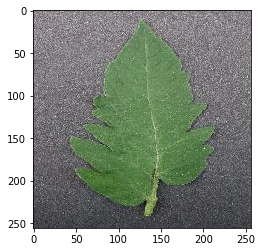

In [149]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1=mpimg.imread('total_data\\T(0).jpg')
#plt.imshow(X_train[0])
imgplot = plt.imshow(img1)
plt.show()

## This Figure shows one example of each diseases (6 class) from the dataset.

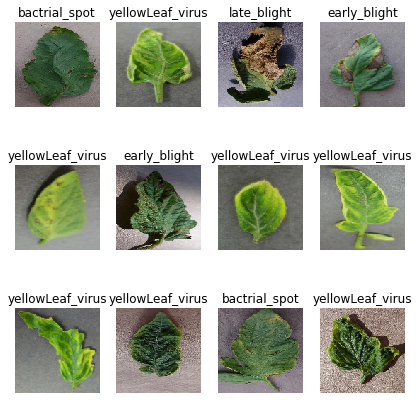

In [95]:
n_rows = 3
n_cols = 4
plt.figure(figsize=(7,7))
for row in range(3):
    for col in range(4):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('plant tomato', tight_layout=False)
plt.show()

## Define the Sequential Model structure
### Create a simple architecture with 4 Dense hidden layer
### and use BatchNormalization, Dropout , L1 & L2 regularization and an output layer.

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50,50,3)))
model.add(Flatten(input_shape=(50,50)))
#model.layer(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(60, kernel_initializer="he_normal", activation='relu'))      #,activity_regularizer=l2(0.001)))
keras.layers.BatchNormalization()
#model.add(BatchNormalization())
model.add(Dense(20,  kernel_initializer='glorot_normal', activation='relu')) #,activity_regularizer=l2(0.001)))
keras.layers.BatchNormalization()
#model.add(BatchNormalization())
model.add(Dense(20, kernel_initializer="glorot_normal" , activation='relu')) #,activity_regularizer=l2(0.001)))
keras.layers.BatchNormalization()
#model.add(BatchNormalization())
model.add(Dense(20, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(6, activation='softmax'))

### With add Batch Normalization the accuracy increase too fast in this model


## Compile Neural Network

In [46]:
#compile with loss func 'sparse_categorical_crossentropy' 'adam' is the beter result than 'sgd'
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Set callback functions to early stop training and save the best model 
# keras.callbacks.callbacks.ModelCheckpoint(filepath='best.h5', monitor='val_loss', verbose=0,
                                          # save_best_only=True, mode='auto', period=1)
callback = [EarlyStopping(monitor='val_loss', patience=3 ), 
            ModelCheckpoint(filepath='model_6disease.h5', monitor='val_loss' , save_best_only=True)]

In [48]:
#train the model on the training set images and validate it
checkpoint = keras.callbacks.ModelCheckpoint( filepath='model_6disease.h5', save_best_only=True)
model.fit(X_train, y_train, 
          epochs=5,                   
          callbacks=[checkpoint],         # Early Stopping & checkpoint
          validation_data=(X_test, y_test),  
          batch_size=32)
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

Train on 8165 samples, validate on 2042 samples
Epoch 1/5
8165/8165 [==============================] - 59s 7ms/sample - loss: 1.4272 - accuracy: 0.4483 - val_loss: 0.8909 - val_accuracy: 0.7135
Epoch 2/5
8165/8165 [==============================] - 58s 7ms/sample - loss: 0.8464 - accuracy: 0.6876 - val_loss: 0.6066 - val_accuracy: 0.7924
Epoch 3/5
8165/8165 [==============================] - 56s 7ms/sample - loss: 0.6260 - accuracy: 0.7800 - val_loss: 0.4356 - val_accuracy: 0.8433
Epoch 4/5
8165/8165 [==============================] - 58s 7ms/sample - loss: 0.5171 - accuracy: 0.8160 - val_loss: 0.4875 - val_accuracy: 0.8237
Epoch 5/5
8165/8165 [==============================] - 58s 7ms/sample - loss: 0.4503 - accuracy: 0.8350 - val_loss: 0.4591 - val_accuracy: 0.8320


In [26]:
# Evalute Model
model.evaluate(X_test, y_test)0 

SyntaxError: invalid syntax (<ipython-input-26-ce585c48f219>, line 2)

In [34]:
#model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Train on 8165 samples, validate on 2042 samples
Epoch 1/10
8165/8165 [==============================] - 58s 7ms/sample - loss: 1.4370 - accuracy: 0.4040 - val_loss: 0.8496 - val_accuracy: 0.7106
Epoch 2/10
8165/8165 [==============================] - 61s 7ms/sample - loss: 0.8770 - accuracy: 0.6950 - val_loss: 0.5720 - val_accuracy: 0.7968
Epoch 3/10
8165/8165 [==============================] - 57s 7ms/sample - loss: 0.6653 - accuracy: 0.7601 - val_loss: 0.5809 - val_accuracy: 0.7880
Epoch 4/10
8165/8165 [==============================] - 58s 7ms/sample - loss: 0.5591 - accuracy: 0.7960 - val_loss: 0.4299 - val_accuracy: 0.8438
Epoch 5/10
8165/8165 [==============================] - 57s 7ms/sample - loss: 0.4526 - accuracy: 0.8336 - val_loss: 0.5860 - val_accuracy: 0.7924
Epoch 6/10
8165/8165 [==============================] - 59s 7ms/sample - loss: 0.4156 - accuracy: 0.8449 - val_loss: 0.3802 - val_accuracy: 0.8663
Epoch 7/10
8165/8165 [==============================] - 59s 7ms/sample

In [359]:
#Evaluate with early stopping best patience 5
model.evaluate(X_test, y_test)

2042/2042 [==============================] - 5s 2ms/step


[0.390551777766337, 0.901077389717102]

In [360]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_26 (Dropout)         (None, 120, 120, 3)       0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 43200)             0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 43200)             172800    
_________________________________________________________________
dense_112 (Dense)            (None, 60)                2592060   
_________________________________________________________________
batch_normalization_72 (Batc (None, 60)                240       
_________________________________________________________________
dense_113 (Dense)            (None, 20)                1220      
_________________________________________________________________
batch_normalization_73 (Batc (None, 20)              

## Making predictions

In [363]:
# the result very difrent in size 28*28 vs size 120*120 in this case we see the probably of 1
#نتایج در حالت سایز 100*100 بسیار متفاوت از حالت 28*28 است با افزایش رزولوشن عکس ها احتمال درستی پیش بینی بسیار متفاوت است بطوریکه با احتمال بالا یا 
# یا با احتمال 1 تعلق به هر رده نشان داده میشود
X_new = X_test[:15]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.99, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]], dtype=float32)

In [364]:
y_predict = model.predict_classes(X_new)
y_predict

array([4, 5, 3, 2, 2, 2, 0, 2, 4, 0, 0, 3, 0, 5, 5], dtype=int64)

### using our Testset for evaluate the Sequential Model 

## Load Testset
#### Import and Read CSV file & Images

In [365]:
test = pd.read_csv('test911.csv')

In [366]:
test.head()

,test_image,lable
0,test(1),0
1,test(2),0
2,test(3),0
3,test(4),0
4,test(5),0


In [367]:
test.iloc[0]

test_image    test(1)
lable               0
Name: 0, dtype: object

In [368]:
test.shape[0]

911

## Load Testset images
#### and appened them to x_test911

In [369]:
test_image =[]
for i in  tqdm(range(test.shape[0])):
        img = image.load_img('test_set\\'+'test('+str(i)+')'+'.jpg', target_size=(120,120))#,grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        test_image.append(img)


100%|████████████████████████████████████████████████████████████████████████████████| 911/911 [00:47<00:00, 19.15it/s]


In [370]:
# append images to x_test911 and lables to y_test911
x_test911= np.array(test_image)
y_test911=test['lable'].values

In [371]:
x_test911.shape

(911, 120, 120, 3)

In [373]:
X_new = x_test911[1:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [374]:
#  2 errore in 11 data 
y_predict = model.predict_classes(X_new)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [375]:
#number of difrent classesin test set
test["lable"].value_counts()

0    265
3    220
1    163
4    125
2     85
5     53
Name: lable, dtype: int64

In [376]:
x_new1 = x_test911[1:30]
x_new2 = x_test911[270:300]
x_new3 = x_test911[483:513]
x_new4 = x_test911[703:733]
x_new5 = x_test911[828:858]
x_new6 = x_test911[880:910]

In [377]:
y_prob1 = model.predict(x_new1)
y_prob2 = model.predict(x_new2)
y_prob3 = model.predict(x_new3)
y_prob4 = model.predict(x_new4)
y_prob5 = model.predict(x_new5)
y_prob6 = model.predict(x_new6)

In [378]:
y_pred1 = model.predict_classes(x_new1)
y_pred2 = model.predict_classes(x_new2)
y_pred3 = model.predict_classes(x_new3)
y_pred4 = model.predict_classes(x_new4)
y_pred5 = model.predict_classes(x_new5)
y_pred6 = model.predict_classes(x_new6)
print((class_names)[y_test911[0]],'       ',y_pred1,"\n"
          ,(class_names)[y_test911[270]],'  ',y_pred2,'\n',
      (class_names)[y_test911[493]],'',y_pred3,'\n',(class_names)[y_test911[713]],'',y_pred4,'\n',
      (class_names)[y_test911[838]],y_pred5,'\n',(class_names)[y_test911[900]],y_pred6)
np.array(class_names)[y_train]

healthy         [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 
 mosai_virus    [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 
 bactrial_spot  [2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 
 yellowLeaf_virus  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3] 
 early_blight [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4] 
 late_blight [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


array(['bactrial_spot', 'yellowLeaf_virus', 'late_blight', ...,
       'yellowLeaf_virus', 'healthy', 'yellowLeaf_virus'], dtype='<U16')

### this is result of model prediction on test set in one of run 
healthy [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]  
 mosai_virus [5 5 2 2 5 5 5 0 2 5 5 5 4 5 2 3 3 5 3 5]  
 bactrial_spot [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]  
 yellowLeaf_virus [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]   
 early_blight [4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4]   
 late_blight [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]  
 secand class in test set is wrong placement  
 عکس های دومین کلاس به اشتباه جایگذاری شده اند

In [379]:
# making predictions
prediction = model.predict(x_test911,batch_size=2)

In [380]:
print(prediction)

[[9.99999046e-01 1.72130456e-07 2.65998334e-08 1.13366433e-07
  4.44458514e-08 6.88847592e-07]
 [9.99999166e-01 6.29335091e-08 1.53472143e-07 2.94934708e-08
  1.93029038e-07 3.53929948e-07]
 [9.99986053e-01 5.20490062e-07 1.08000634e-07 5.26385158e-08
  2.74550644e-07 1.31156849e-05]
 ...
 [1.35413375e-05 7.02294301e-06 3.13818245e-03 1.59392541e-04
  3.59728147e-05 9.96645868e-01]
 [2.56689906e-04 7.09595724e-06 2.35454099e-05 5.93860750e-05
  1.62828055e-05 9.99637008e-01]
 [1.03649392e-04 7.13714508e-06 8.89546427e-05 1.37340248e-04
  1.09383163e-05 9.99652028e-01]]


## Evaluate data with test set

In [382]:
score = model.evaluate(x_test911, y_test911, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.2217570490739997
Test accuracy: 0.8704720139503479


In [383]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.003109408298815605
Test accuracy: 0.9996325969696045


In [384]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.390551777766337
Test accuracy: 0.901077389717102


# Functional API

In [385]:
np.random.seed(42)
tf.random.set_seed(42)

In [386]:
X_train.shape[1:]

(120, 120, 3)

In [50]:
input1 = keras.layers.Input(shape=(50,50,3))
#model.add(Flatten(input_shape=(28,28,1)))
#input1 = keras.layers.Input(shape=X_train.shape[1:])
h1 = keras.layers.Flatten()(input1)
h2 = keras.layers.Dense(60, activation="relu")(h1)
keras.layers.BatchNormalization()
h3 = keras.layers.Dense(30, activation="relu")(h2)
keras.layers.BatchNormalization()
#h4 = keras.layers.Dense(20, activation="relu")(h3)
keras.layers.BatchNormalization()
#h5 = keras.layers.Dense(30, activation="relu")(h4)
concat1 = keras.layers.concatenate([h2, h3])
#concat2 = keras.layers.concatenate([h3, h4])
#concat3 = keras.layers.concatenate([concat1, concat2])
output = keras.layers.Dense(1)(concat1)
model = keras.models.Model(inputs=[input1], outputs=[output])

In [ ]:
keras.utils.plot_model(model,  show_shapes=True)

In [410]:
input1.shape

TensorShape([None, 120, 120, 3])

In [411]:
h2.shape

TensorShape([None, 60])

In [390]:
output.shape

TensorShape([None, 1])

In [266]:
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [412]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 120, 120, 3)  0                                            
__________________________________________________________________________________________________
flatten_31 (Flatten)            (None, 43200)        0           input_18[0][0]                   
__________________________________________________________________________________________________
dense_125 (Dense)               (None, 60)           2592060     flatten_31[0][0]                 
__________________________________________________________________________________________________
dense_126 (Dense)               (None, 30)           1830        dense_125[0][0]                  
___________________________________________________________________________________________

In [51]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=5,
       #             validation_data=(X_test, y_test))
#mse_test = model.evaluate(X_test, y_test)
#y_pred = model.predict(X_new)

In [56]:
#early_stopping = keras.callbacks.EarlyStopping(patience=8,
                                                 # restore_best_weights=True)
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),batch_size=32)#,callbacks=[early_stopping])
early_stopping = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
model.fit(X_train, y_train, epochs=4,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Train on 8165 samples, validate on 2042 samples
Epoch 1/4
8165/8165 [==============================] - 3s 390us/sample - loss: 1.0156 - accuracy: 0.0944 - val_loss: 0.9910 - val_accuracy: 0.0911
Epoch 2/4
8165/8165 [==============================] - 3s 360us/sample - loss: 0.9520 - accuracy: 0.0968 - val_loss: 0.9712 - val_accuracy: 0.1068
Epoch 3/4
8165/8165 [==============================] - 3s 360us/sample - loss: 0.9247 - accuracy: 0.0999 - val_loss: 1.3304 - val_accuracy: 0.1567
Epoch 4/4
8165/8165 [==============================] - 3s 365us/sample - loss: 0.8984 - accuracy: 0.1025 - val_loss: 0.8932 - val_accuracy: 0.0989


In [427]:
model.evaluate(X_test, y_test)

2042/2042 [==============================] - 2s 840us/step


[0.8909886571032294, 0.4813908040523529]

## Evaluate model by test set

In [428]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score1[0])
print('Test accuracy:', score1[1])

Test score: 0.8909886571032294
Test accuracy: 0.4813908040523529


In [429]:
score_test = model.evaluate(x_test911, y_test911, verbose=0)
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

Test score: 0.7916132131863374
Test accuracy: 0.4818880259990692


In [431]:
X_new = x_test911[900:905]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[3.67],
       [4.19],
       [5.2 ],
       [4.25],
       [3.56]], dtype=float32)

In [432]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [433]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2019_11_18-20_41_50'

In [434]:
model.save("model_6disease.h5")

In [435]:
model = keras.models.load_model("model_6disease.h5")